In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
names = ['name',
 'landmass',
 'zone',
 'area',
 'population',
 'language',
 'religion',
 'bars',
 'stripes',
 'colours',
 'red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'mainhue',
 'circles',
 'crosses',
 'saltires',
 'quarters',
 'sunstars',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text',
 'topleft',
 'botright']

In [3]:
data= pd.read_csv('flag.data', sep=",", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [4]:
data.columns = names

In [5]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


# Описательный анализ

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
landmass,194.0,3.572165,1.553018,1.0,3.0,4.0,5.00,6.0
zone,194.0,2.211340,1.308274,1.0,1.0,2.0,4.00,4.0
area,194.0,700.046392,2170.927932,0.0,9.0,111.0,471.25,22402.0
population,194.0,23.268041,91.934085,0.0,0.0,4.0,14.00,1008.0
language,194.0,5.340206,3.496517,1.0,2.0,6.0,9.00,10.0
religion,194.0,2.190722,2.061167,0.0,1.0,1.0,4.00,7.0
bars,194.0,0.453608,1.038339,0.0,0.0,0.0,0.00,5.0
stripes,194.0,1.551546,2.328005,0.0,0.0,0.0,3.00,14.0
colours,194.0,3.463918,1.300154,1.0,3.0,3.0,4.00,8.0
red,194.0,0.788660,0.409315,0.0,1.0,1.0,1.00,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [8]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [9]:
data['target'] = data['religion']

In [10]:
data = data.drop(['name','religion'], axis=1)

In [11]:
dummycolumns = ['topleft', 'botright', 'mainhue']
datafordummy = data[ dummycolumns]
dummies = pd.get_dummies(datafordummy)
dummies.head()

,topleft_black,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,...,botright_red,botright_white,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [12]:
data = data.drop(['topleft', 'botright', 'mainhue'], axis=1)

In [13]:
data = pd.concat([data, dummies], axis = 1)

In [14]:
data.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,botright_red,botright_white,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white
0,5,1,648,16,10,0,3,5,1,1,...,0,0,0,0,0,0,1,0,0,0
1,3,1,29,3,6,0,0,3,1,0,...,1,0,0,0,0,0,0,0,1,0
2,4,1,2388,20,8,2,0,3,1,1,...,0,1,0,0,0,0,1,0,0,0
3,6,3,0,0,1,0,0,5,1,0,...,1,0,0,1,0,0,0,0,0,0
4,3,1,0,0,6,3,0,3,1,0,...,1,0,0,0,0,1,0,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 49 columns):
landmass           194 non-null int64
zone               194 non-null int64
area               194 non-null int64
population         194 non-null int64
language           194 non-null int64
bars               194 non-null int64
stripes            194 non-null int64
colours            194 non-null int64
red                194 non-null int64
green              194 non-null int64
blue               194 non-null int64
gold               194 non-null int64
white              194 non-null int64
black              194 non-null int64
orange             194 non-null int64
circles            194 non-null int64
crosses            194 non-null int64
saltires           194 non-null int64
quarters           194 non-null int64
sunstars           194 non-null int64
crescent           194 non-null int64
triangle           194 non-null int64
icon               194 non-null int64
animate            19

In [16]:
data.corr()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,botright_red,botright_white,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white
landmass,1.000000,-0.615759,0.013279,0.105940,0.496400,-0.139290,-0.063375,-0.062856,0.093400,0.026226,...,-0.051991,-0.043860,0.023923,-0.105997,0.094078,0.012638,0.020551,0.086910,0.120039,-0.163588
zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,0.085446,0.002359,0.173567,-0.032269,0.069404,...,-0.029562,-0.022252,-0.051272,0.190853,-0.094745,-0.000206,-0.016727,-0.106894,-0.123050,0.066657
area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.001243,0.028454,-0.162227,-0.005470,-0.081328,...,0.132225,-0.051944,-0.024957,-0.067191,-0.029438,-0.053988,0.025614,0.050304,0.075096,-0.008041
population,0.105940,-0.124111,0.519030,1.000000,0.062804,-0.041392,0.030100,-0.115052,-0.024648,-0.047918,...,0.099872,-0.005876,0.000944,-0.100282,-0.016994,-0.058836,-0.020452,0.247607,0.058812,0.011364
language,0.496400,-0.618387,-0.027869,0.062804,1.000000,-0.049862,0.105409,-0.197883,-0.011048,0.006046,...,0.004711,0.079541,-0.025194,-0.221426,0.107104,0.002666,0.070404,0.037851,0.137601,-0.048872
bars,-0.139290,0.085446,0.001243,-0.041392,-0.049862,1.000000,-0.273371,-0.064574,-0.017093,0.116905,...,0.111257,-0.065329,-0.008419,-0.124800,-0.044702,0.274309,0.094244,-0.063550,-0.157116,0.078807
stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,-0.273371,1.000000,0.038278,0.014210,-0.085367,...,-0.074459,0.028450,0.017404,-0.027775,-0.068197,-0.040924,-0.073295,0.043644,0.105258,-0.007939
colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.064574,0.038278,1.000000,0.311759,0.428388,...,-0.074815,-0.096810,-0.008017,0.210683,-0.075863,0.055974,-0.004138,0.059981,-0.098510,-0.165550
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,-0.017093,0.014210,0.311759,1.000000,0.031169,...,0.384606,0.026470,0.084198,-0.235512,-0.197160,0.128092,-0.222200,-0.102590,0.393299,-0.093595
green,0.026226,0.069404,-0.081328,-0.047918,0.006046,0.116905,-0.085367,0.428388,0.031169,1.000000,...,-0.245239,-0.145179,-0.087697,-0.172665,-0.095933,0.003045,0.463965,0.081679,-0.070850,-0.173287


In [17]:
import pandas_profiling as pp
report = pp.ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})
report.to_file('profile_report.html')

Заменим нулевые значения

In [18]:
median_area = data['area'].median()
median_population = data['population'].median()

In [19]:
data=data.replace({'area': {0: median_area}}) 
data=data.replace({'population': {0: median_population}}) 

In [20]:
data['population'] = np.log(data['population'])
data['area'] = np.log(data['area'])

Посмотрим на корреляцию некоторых переменных с целевой переменной и их форму распределения

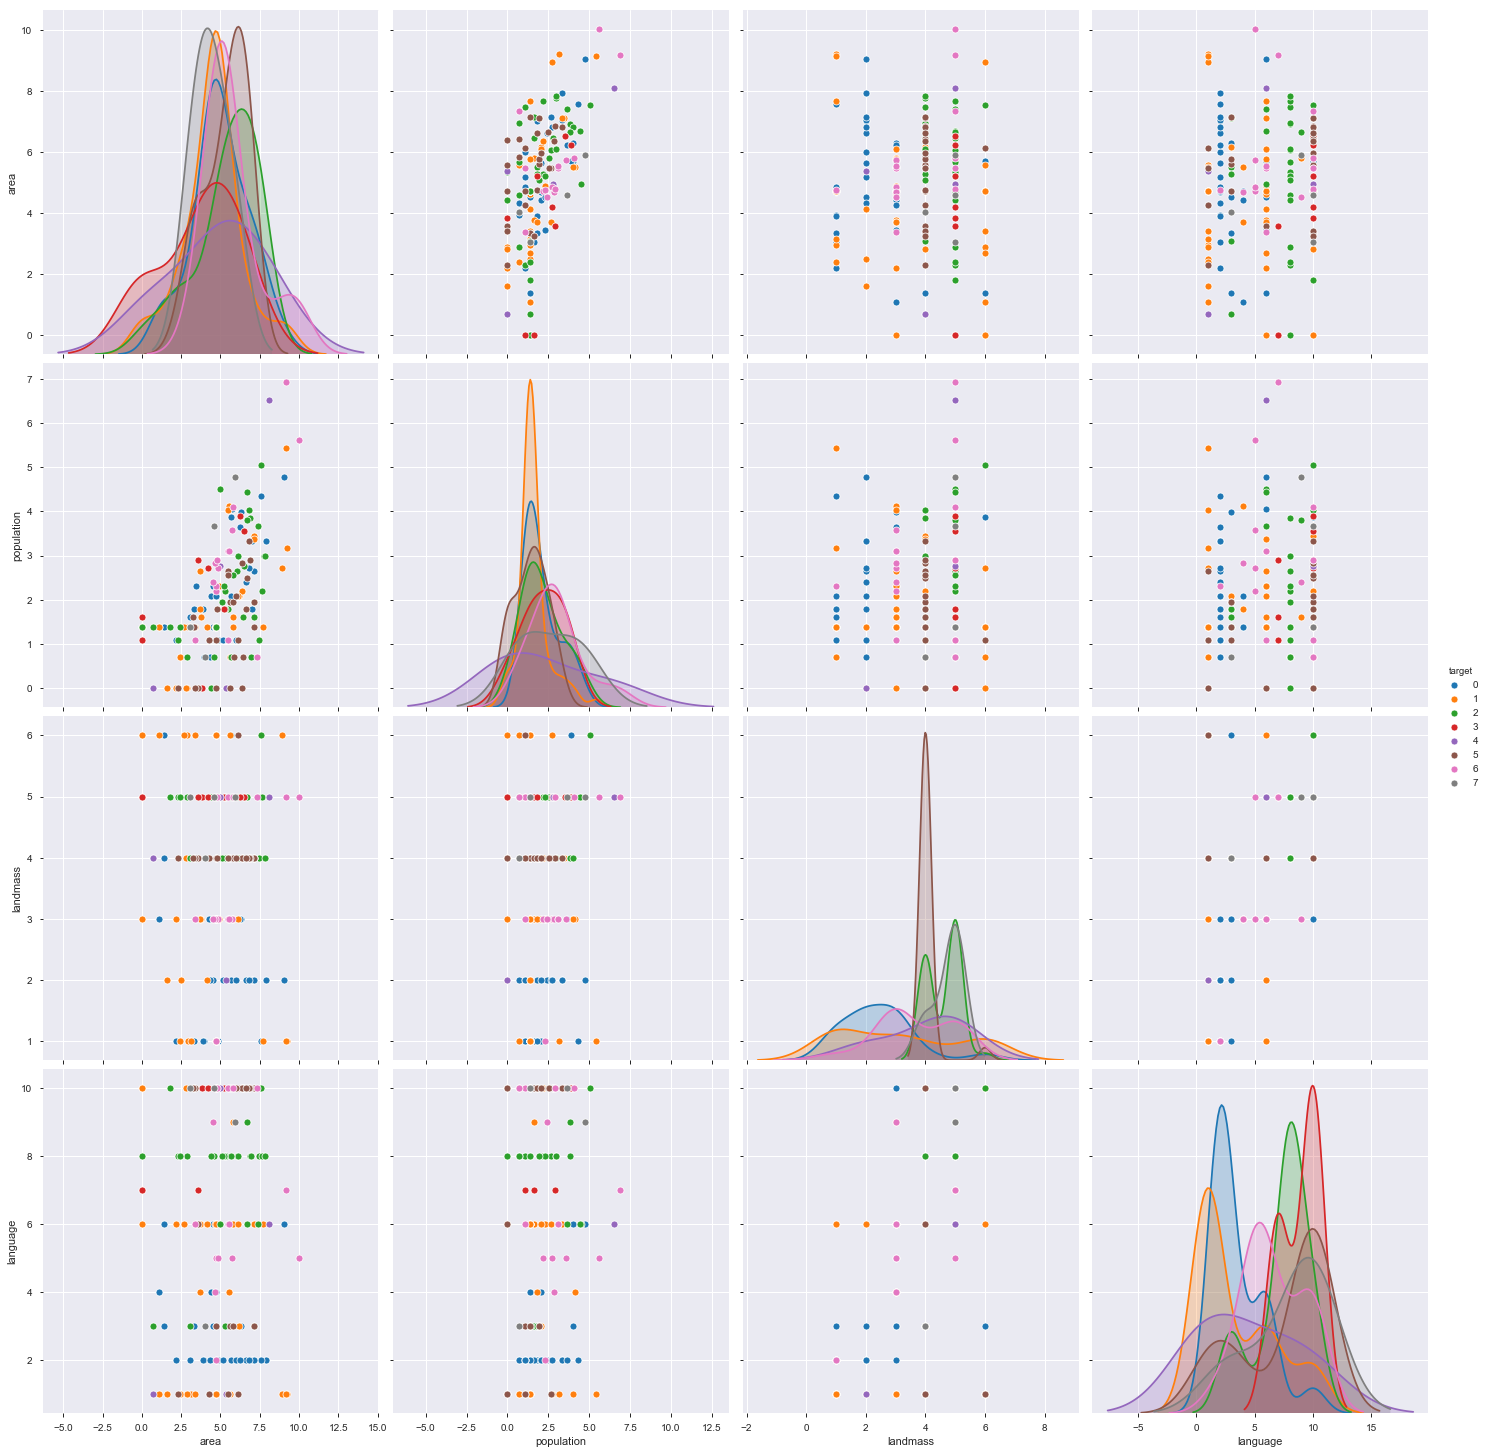

In [21]:
columns_ = data[['area', 'population', 'landmass', 'language', 'target']]
sns.pairplot(columns_, hue='target', height = 5)
# religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 

Будем использовать деревья и KNN, которые устойчивы к отсутствию нормального распределения данных

Разделим выборку на обучающую и тестовую

In [22]:
x_columns =[x for x in data.columns if x != 'target']
X = data[x_columns]
y = data['target']

# Decision tree classifier

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=30, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [26]:
y_pred = tree.predict(X_test)

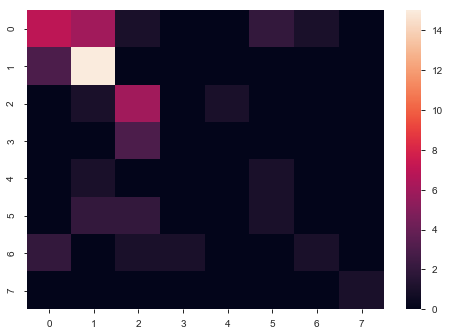

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm)
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5254237288135594


In [29]:
importances = tree.feature_importances_
importances

array([0.26492809, 0.        , 0.01550922, 0.11146386, 0.23342876,
       0.0625    , 0.01688782, 0.06886966, 0.        , 0.02458273,
       0.00904704, 0.        , 0.        , 0.02294072, 0.00904704,
       0.01206273, 0.03263895, 0.        , 0.        , 0.02412545,
       0.        , 0.        , 0.        , 0.01206273, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01343349, 0.        ,
       0.        , 0.        , 0.        , 0.02755505, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00904704,
       0.01077029, 0.        , 0.01909932])

# Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
forest = RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_jobs=30, random_state = 1)
forest.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=30, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [32]:
y_pred = forest.predict(X_test)

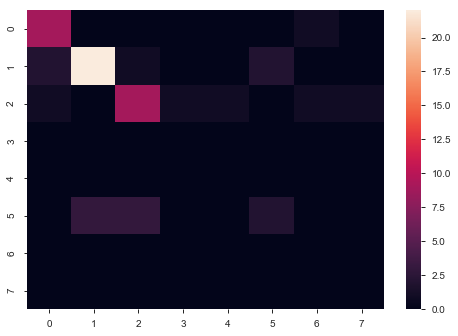

In [33]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm)
plt.show()

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.711864406779661


In [35]:
importances = tree.feature_importances_
importances

array([0.26492809, 0.        , 0.01550922, 0.11146386, 0.23342876,
       0.0625    , 0.01688782, 0.06886966, 0.        , 0.02458273,
       0.00904704, 0.        , 0.        , 0.02294072, 0.00904704,
       0.01206273, 0.03263895, 0.        , 0.        , 0.02412545,
       0.        , 0.        , 0.        , 0.01206273, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01343349, 0.        ,
       0.        , 0.        , 0.        , 0.02755505, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00904704,
       0.01077029, 0.        , 0.01909932])

In [36]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [37]:
f1_score(y_pred, y_test, average='macro') 

0.3330419580419581

In [38]:
precision_score(y_pred, y_test, average='macro')

0.35278846153846155

In [39]:
recall_score(y_pred, y_test, average='macro')

0.3259589947089947

# KNN classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors = 7, metric='minkowski', p=2)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [43]:
y_pred = knn.predict(X_test)

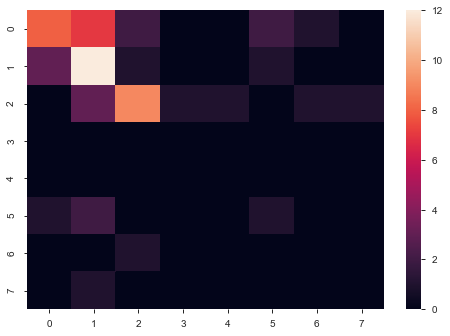

In [44]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm)
plt.show()

In [45]:
print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 0.5084745762711864


In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(194, 10)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [51]:
y_pred = knn.predict(X_test)

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.423728813559322


In [53]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 135
Количество элементов после операции: 304


Using TensorFlow backend.


In [54]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 38, 1: 38, 2: 38, 3: 38, 4: 38, 5: 38, 6: 38, 7: 38}

In [55]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 10, 1: 22, 2: 6, 3: 2, 4: 1, 5: 11, 6: 5, 7: 2}

In [56]:
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [57]:
y_pred = knn.predict(X_test)

In [58]:
y_pred

array([6, 1, 6, 2, 6, 3, 0, 0, 1, 2, 0, 0, 0, 0, 5, 6, 1, 4, 2, 6, 3, 6,
       0, 6, 0, 0, 1, 1, 5, 6, 2, 5, 7, 4, 0, 0, 3, 0, 1, 0, 6, 2, 7, 4,
       5, 3, 6, 2, 7, 0, 0, 1, 0, 6, 4, 2, 6, 0, 4])

In [59]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3389830508474576


In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
results = cross_val_score(knn, X_resampled, y_resampled, cv=10)
print(results)
print('Average result: {}'.format(round(np.mean(results), 3)))

[0.80645161 0.70967742 0.64516129 0.67741935 0.73333333 0.73333333
 0.73333333 0.73333333 0.8        0.66666667]
Average result: 0.724


In [62]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted  0  1  2  3  4  5  6  7
Actual                           
0          5  0  1  0  1  0  3  0
1          8  7  2  1  0  2  2  0
2          0  0  3  0  2  0  0  1
3          0  0  0  0  0  1  1  0
4          0  0  0  0  0  0  0  1
5          3  0  1  3  0  1  2  1
6          1  0  0  0  0  0  4  0
7          0  0  0  0  2  0  0  0


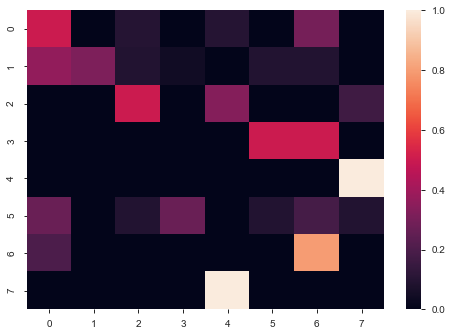

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm)
plt.show()

Ради интереса, попробовала, что будет, если использовать PCA и oversampling на деревьях

In [64]:
forest.fit(X_resampled, y_resampled) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=30, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [65]:
y_pred = forest.predict(X_test)

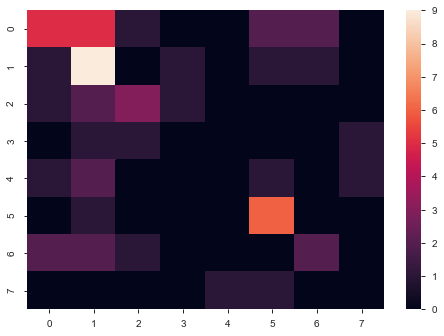

In [66]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm)
plt.show()

In [67]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.423728813559322


#### Результаты:
- decision tree: 52.5%
- random forest: 71.2%
- random forest with PCA and oversampling: 42.4%
- KNN: 50.8%
- KNN with PCA: 42.4%
- KNN with PCA and oversampling: 33.8%%